In [1]:
#importing nessesary modules and libraries
import pandas as pd
import seaborn as sns

In [3]:
#loading data
df = pd.read_excel(r"/home/lynn/Documents/MDSF Data science/datasets/Customer_dataset.xlsx")

#the set_option is to have the display.precision showing 2 digits after point
pd.set_option("display.precision", 2)

## Exploratory Analysis = Overview

In [4]:
#overview of the data
df.head(5)

,CustomerID,Date_of_Birth,Is_Working,Monthly_income,Unnamed: 4
0,1000,20,0,380,NaN
1,1001,18,0,210,NaN
2,1002,21,0,180,NaN
3,1003,21,0,190,NaN
4,1004,18,0,250,NaN


## here you can notice:
1- unnamed: 4, it might be due to importing the data from xlsx file.


2- in total we should have 4 columns

In [5]:
df.tail(5)

,CustomerID,Date_of_Birth,Is_Working,Monthly_income,Unnamed: 4
196,1196,19,0,190,NaN
197,1197,19,0,210,NaN
198,1198,19,0,320,NaN
199,1199,18,0,180,NaN
200,1200,22,1,1350,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      201 non-null    int64  
 1   Date_of_Birth   201 non-null    int64  
 2   Is_Working      201 non-null    int64  
 3   Monthly_income  201 non-null    int64  
 4   Unnamed: 4      0 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 8.0 KB


In [7]:
df.isnull().sum()

CustomerID          0
Date_of_Birth       0
Is_Working          0
Monthly_income      0
Unnamed: 4        201
dtype: int64

In [8]:
#we have 1005 elements in our dataset
df.size

1005

In [9]:
#we have 201 rows & 5 columns in our dataset
df.shape

(201, 5)

In [10]:
#renaming the columns, better manipulation, inplace to affect the original data
df.rename(columns = {"Date_of_Birth": "Age", "CustomerID":"ID", "Is_Working": "Work_Status"}, inplace = True)
df

,ID,Age,Work_Status,Monthly_income,Unnamed: 4
0,1000,20,0,380,NaN
1,1001,18,0,210,NaN
2,1002,21,0,180,NaN
3,1003,21,0,190,NaN
4,1004,18,0,250,NaN
...,...,...,...,...,...
196,1196,19,0,190,NaN
197,1197,19,0,210,NaN
198,1198,19,0,320,NaN
199,1199,18,0,180,NaN


In [11]:
#removing column of index[4], cz the non-null count = 0 using iloc
df = df.iloc[:,0:4 ]
df

,ID,Age,Work_Status,Monthly_income
0,1000,20,0,380
1,1001,18,0,210
2,1002,21,0,180
3,1003,21,0,190
4,1004,18,0,250
...,...,...,...,...
196,1196,19,0,190
197,1197,19,0,210
198,1198,19,0,320
199,1199,18,0,180


In [12]:
df.describe()

,ID,Age,Work_Status,Monthly_income
count,201.00,201.00,201.00,201.00
mean,1100.00,28.90,0.45,1143.03
std,58.17,11.63,0.50,1180.37
min,1000.00,18.00,0.00,100.00
25%,1050.00,20.00,0.00,210.00
50%,1100.00,23.00,0.00,360.00
75%,1150.00,36.00,1.00,1970.00
max,1200.00,60.00,1.00,3960.00


## The bank asked for : Analysis for Age<25

In [13]:
#filter the data
df_25 = df[df['Age'] < 25]
df_25.head()

,ID,Age,Work_Status,Monthly_income
0,1000,20,0,380
1,1001,18,0,210
2,1002,21,0,180
3,1003,21,0,190
4,1004,18,0,250


<AxesSubplot:xlabel='Age', ylabel='count'>

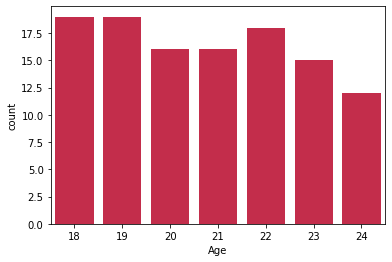

In [14]:
sns.countplot(x="Age", data=df_25, color = "crimson", orient="v")

The Mean Monthly income of Unemployed customers 234.44 $
The Mean Monthly income of employed customers 1252.5 $


<AxesSubplot:>

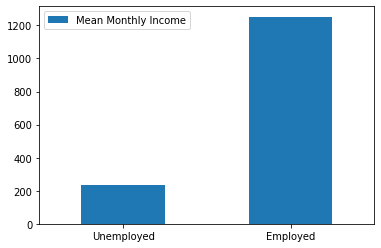

In [26]:
a = df_25[df_25['Work_Status'] == 0]['Monthly_income'].mean().round(2)
b = df_25[df_25['Work_Status'] == 1]['Monthly_income'].mean()
print("The Mean Monthly income of Unemployed customers",a,"$")
print("The Mean Monthly income of employed customers",b, "$")


index1 = ["Unemployed", 'Employed']
MMI = [a,b]
df1 = pd.DataFrame({'Mean Monthly Income': MMI}, index=index1)
df1.plot.bar(rot=0)


The sum Monthly income of Unemployed customers 23210 $
The sum Monthly income of employed customers 20040 $


<AxesSubplot:>

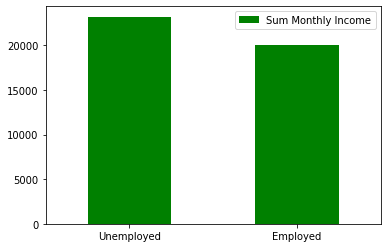

In [27]:
x = df_25[df_25['Work_Status'] == 0]['Monthly_income'].sum()
y = df_25[df_25['Work_Status'] == 1]['Monthly_income'].sum()
print("The sum Monthly income of Unemployed customers",x,"$")
print("The sum Monthly income of employed customers",y, "$")



index2 = ["Unemployed", 'Employed']
SMI = [x,y]
df2 = pd.DataFrame({'Sum Monthly Income': SMI}, index=index2)
df2.plot.bar(rot=0, color={"Sum Monthly Income": "green"})


The total number of unemployed customers is 99
The total number of employed customers is 16


<AxesSubplot:>

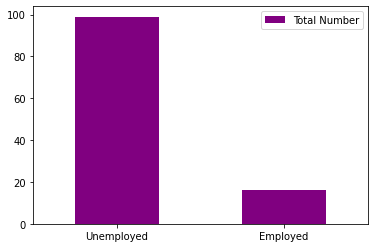

In [28]:
c = df_25[df_25['Work_Status']==0].shape[0]
print("The total number of unemployed customers is",c)

e = df_25[df_25['Work_Status']==1].shape[0]
print("The total number of employed customers is",e)


index3 = ["Unemployed", 'Employed']
TN = [c,e]
df3 = pd.DataFrame({'Total Number': TN}, index=index3)
df3.plot.bar(rot=0, color={"Total Number": "purple"})


In [29]:
# based on the above numbers, it is better to target 16 customers who are employed, each with 1252$ as average income
# here is a list of their ID 
d = df_25[df_25['Work_Status']==1]['ID'].sort_values(ascending = True)
print("The ID of those 16 target customers: ")
for i in d:
    print(i)

The ID of those 16 target customers: 
1007
1011
1012
1021
1040
1042
1051
1054
1067
1070
1173
1174
1184
1192
1194
1200


## If The bank would increase the age boundary : Analysis for Age<30

In [19]:
#filter the data
df_30 = df[df['Age'] < 30]
df_30.head()

,ID,Age,Work_Status,Monthly_income
0,1000,20,0,380
1,1001,18,0,210
2,1002,21,0,180
3,1003,21,0,190
4,1004,18,0,250


<AxesSubplot:xlabel='Age', ylabel='count'>

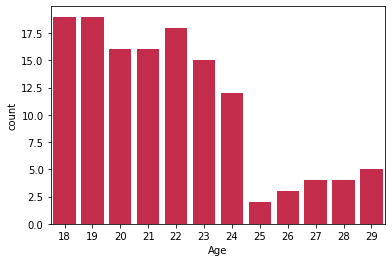

In [36]:
sns.countplot(x="Age", data=df_30, color = "crimson", orient="v")

The Mean Monthly income of Unemployed customers 237.02 $
The Mean Monthly income of employed customers 1932.41 $


<AxesSubplot:>

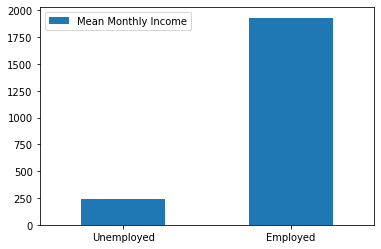

In [20]:
a = df_30[df_30['Work_Status'] == 0]['Monthly_income'].mean().round(2)
b = df_30[df_30['Work_Status'] == 1]['Monthly_income'].mean().round(2)
print("The Mean Monthly income of Unemployed customers",a,"$")
print("The Mean Monthly income of employed customers",b, "$")

index1 = ["Unemployed", 'Employed']
MMI = [a,b]
df1 = pd.DataFrame({'Mean Monthly Income': MMI}, index=index1)
df1.plot.bar(rot=0)

The sum Monthly income of Unemployed customers 24650 $
The sum Monthly income of employed customers 56040 $


<AxesSubplot:>

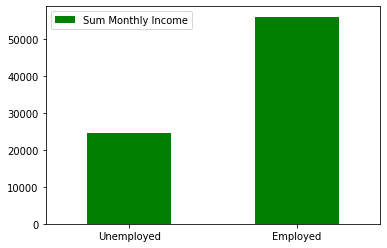

In [21]:
x = df_30[df_30['Work_Status'] == 0]['Monthly_income'].sum()
y = df_30[df_30['Work_Status'] == 1]['Monthly_income'].sum()
print("The sum Monthly income of Unemployed customers",x,"$")
print("The sum Monthly income of employed customers",y, "$")


index2 = ["Unemployed", 'Employed']
SMI = [x,y]
df2 = pd.DataFrame({'Sum Monthly Income': SMI}, index=index2)
df2.plot.bar(rot=0, color={"Sum Monthly Income": "green"})


The total number of unemployed customers is 104
The total number of employed customers is 29


<AxesSubplot:>

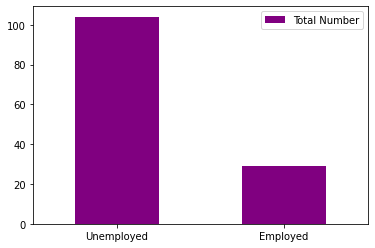

In [22]:
j = df_30[df_30['Work_Status']==0].shape[0]
print("The total number of unemployed customers is",j)

k = df_30[df_30['Work_Status']==1].shape[0]
print("The total number of employed customers is",k)


index3 = ["Unemployed", 'Employed']
TN = [j,k]
df3 = pd.DataFrame({'Total Number': TN}, index=index3)
df3.plot.bar(rot=0, color={"Total Number": "purple"})


In [30]:
# based on the above numbers, it is better to target 29 customers instead of 16 who are employed, 
#each with 1932$ instead of 1252$ as average income
# here is a list of their ID 
f = df_30[df_30['Work_Status']==1]['ID'].sort_values(ascending = True)
print("The ID of additional potential target customers: ")
for i in f:
    if i in d.values:
        continue
    else:
        print(i)


The ID of additional potential target customers: 
1108
1110
1111
1112
1113
1114
1116
1117
1118
1125
1126
1128
1140


In [37]:
diff = (j+k)-(c +e)
print("There are",diff, "people with their age between 25 and 30")
print("out of those")

There are 18 people with their age between 25 and 30
